Implementation of an oracle encoded with 011

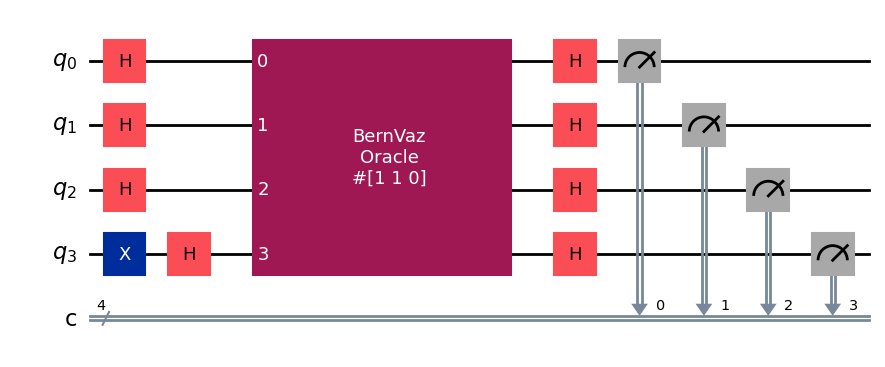

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
from numpy import random

def create_random_oracle():
  # generate a 3-item array of random zeros and ones
  secret_code = random.randint(2, size=3)

  bv_circuit = QuantumCircuit(4, name="BernVaz\nOracle\n#{}".format(secret_code))

  # loop through each digit of our secret code and CNOT the appropriate 
  # code qubit with the control qubit
  idx = 0
  for idx, digit in enumerate(secret_code):
    if digit == 1:
      bv_circuit.cx(idx, 3)

  # create our custom gate
  bern_vaz_oracle = bv_circuit.to_instruction()
  
  return [secret_code, bern_vaz_oracle]

q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

# put our input qubits into superposition
qc.h(0)
qc.h(1)
qc.h(2)

qc.x(3) # initialize the control qubit to |1>
qc.h(3)

secret_code, oracle = create_random_oracle()

# hook the custom gate into qubits 0-3
qc.append(oracle, [0,1,2,3])

# take the outputs out of superposition
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)

qc.draw(output='mpl')


In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(transpile(qc.reverse_bits(), simulator)).result()

print("Secret code is {}".format(secret_code))

counts = result.get_counts(qc)
print("Simulation result is {}".format(counts))

answer = [*counts][0] # get the first key of the result dict

print("We got the answer: " + answer[0:3])

Secret code is [1 1 0]
Simulation result is {'1101': 1024}
We got the answer: 110
